## Term Project: Identifying Land Cover changes with NLCD and Landsat imagery using Google Earth Engine 
### Aaron Sigman

In [1]:
from IPython.display import Image
import ee
import matplotlib.pyplot as plt
import os
import pandas as pd
import numpy as np
ee.Initialize()

In [2]:
import geemap

In [3]:
# Define area of interest
Point = ee.Geometry.Point([-105.0000, 39.5065])
Area = Point.buffer(14000)

In [4]:
# Get NLCD 2016 map for the region
image=ee.ImageCollection("USGS/NLCD_RELEASES/2016_REL")
image=image.filter(ee.Filter.eq('system:index', '2016')).first()
NLCD2016=image.clip(Area)
band_names=NLCD2016.bandNames()
print(band_names.getInfo())

['landcover', 'impervious', 'impervious_descriptor', 'percent_tree_cover', 'rangeland_annual_herbaceous', 'rangeland_bare_ground', 'rangeland_big_sagebrush', 'rangeland_herbaceous', 'rangeland_litter', 'rangeland_sagebrush', 'rangeland_sagebrush_height', 'rangeland_shrub', 'rangeland_shrub_height']


In [5]:
TotalCount=NLCD2016.reduceRegion(ee.Reducer.count(), Area, 30)
LULCCount=NLCD2016.select('landcover').reduceRegion(ee.Reducer.autoHistogram(),Area,30)
print(TotalCount.getInfo())
print(LULCCount.getInfo().get('landcover'))
df2016=pd.DataFrame.from_dict(LULCCount.getInfo().get('landcover'))
df2016.columns=['index',"2016_count"]
df2016=df2016.set_index('index')
df2016=df2016[df2016['2016_count']>0]
df2016["2016_percent"]=df2016["2016_count"]/TotalCount.getInfo().get('landcover')*100
df2016

{'impervious': 676641, 'impervious_descriptor': 676641, 'landcover': 676641, 'percent_tree_cover': 676641, 'rangeland_annual_herbaceous': 478789, 'rangeland_bare_ground': 478789, 'rangeland_big_sagebrush': 478789, 'rangeland_herbaceous': 478789, 'rangeland_litter': 478789, 'rangeland_sagebrush': 478789, 'rangeland_sagebrush_height': 478789, 'rangeland_shrub': 478789, 'rangeland_shrub_height': 478789}
[[11, 12033.952941176474], [12, 0], [13, 0], [14, 0], [15, 0], [16, 0], [17, 0], [18, 0], [19, 0], [20, 0], [21, 90771.50980392154], [22, 106763.07450980386], [23, 54867.44313725489], [24, 14596.752941176472], [25, 0], [26, 0], [27, 0], [28, 0], [29, 0], [30, 0], [31, 73], [32, 0], [33, 0], [34, 0], [35, 0], [36, 0], [37, 0], [38, 0], [39, 0], [40, 0], [41, 20656.403921568624], [42, 41158.16862745101], [43, 1304.1843137254903], [44, 0], [45, 0], [46, 0], [47, 0], [48, 0], [49, 0], [50, 0], [51, 0], [52, 132784.40784313728], [53, 0], [54, 0], [55, 0], [56, 0], [57, 0], [58, 0], [59, 0], [60

,2016_count,2016_percent
index,,
11,12033.952941,1.778484
21,90771.509804,13.415018
22,106763.074510,15.778393
23,54867.443137,8.108797
24,14596.752941,2.157237
31,73.000000,0.010789
41,20656.403922,3.052786
42,41158.168627,6.082719
43,1304.184314,0.192744


In [6]:
Map = geemap.Map()
Map.centerObject(Area)
Map.addLayer(Area, {'outline': 2}, name='Study Area')
landcover = {'bands': ['landcover']}
Map.addLayer(NLCD2016,landcover, name='NLCD 2016')
#Map.add_legend(builtin_legend='NLCD')
Map

Map(center=[20, 0], controls=(WidgetControl(options=['position', 'transparent_bg'], widget=HBox(children=(Togg…

In [7]:
# Get NLCD 2016 map for the region
image=ee.ImageCollection("USGS/NLCD_RELEASES/2019_REL/NLCD")
image=image.filter(ee.Filter.eq('system:index', '2019')).first()
NLCD2019=image.clip(Area)
band_names=NLCD2019.bandNames()
print(band_names.getInfo())

['landcover', 'impervious', 'impervious_descriptor']


In [8]:
TotalCount=NLCD2019.reduceRegion(ee.Reducer.count(), Area, 30)
LULCCount=NLCD2019.select('landcover').reduceRegion(ee.Reducer.autoHistogram(),Area,30)
print(TotalCount.getInfo())
print(LULCCount.getInfo().get('landcover'))
df2019=pd.DataFrame.from_dict(LULCCount.getInfo().get('landcover'))
df2019.columns=['index',"2019_count"]
df2019=df2019.set_index('index')
df2019=df2019[df2019['2019_count']>0]
df2019["2019_percent"]=df2019["2019_count"]/TotalCount.getInfo().get('landcover')*100
df2019


{'impervious': 676641, 'impervious_descriptor': 676641, 'landcover': 676641}
[[11, 11875.168627450985], [12, 0], [13, 0], [14, 0], [15, 0], [16, 0], [17, 0], [18, 0], [19, 0], [20, 0], [21, 77787.38039215683], [22, 99060.49411764702], [23, 76367.71764705885], [24, 22199.086274509802], [25, 0], [26, 0], [27, 0], [28, 0], [29, 0], [30, 0], [31, 121], [32, 0], [33, 0], [34, 0], [35, 0], [36, 0], [37, 0], [38, 0], [39, 0], [40, 0], [41, 20239.764705882353], [42, 42233.16470588238], [43, 1310.105882352941], [44, 0], [45, 0], [46, 0], [47, 0], [48, 0], [49, 0], [50, 0], [51, 0], [52, 127422.46274509808], [53, 0], [54, 0], [55, 0], [56, 0], [57, 0], [58, 0], [59, 0], [60, 0], [61, 0], [62, 0], [63, 0], [64, 0], [65, 0], [66, 0], [67, 0], [68, 0], [69, 0], [70, 0], [71, 176958.6431372548], [72, 0], [73, 0], [74, 0], [75, 0], [76, 0], [77, 0], [78, 0], [79, 0], [80, 0], [81, 12], [82, 502], [83, 0], [84, 0], [85, 0], [86, 0], [87, 0], [88, 0], [89, 0], [90, 5657.454901960785], [91, 0], [92, 0],

,2019_count,2019_percent
index,,
11,11875.168627,1.755018
21,77787.380392,11.496108
22,99060.494118,14.640037
23,76367.717647,11.286298
24,22199.086275,3.280778
31,121.000000,0.017882
41,20239.764706,2.991212
42,42233.164706,6.241591
43,1310.105882,0.193619


In [9]:
df_combine=pd.concat([df2016,df2019],axis=1)
df_combine

,2016_count,2016_percent,2019_count,2019_percent
index,,,,
11,12033.952941,1.778484,11875.168627,1.755018
21,90771.509804,13.415018,77787.380392,11.496108
22,106763.074510,15.778393,99060.494118,14.640037
23,54867.443137,8.108797,76367.717647,11.286298
24,14596.752941,2.157237,22199.086275,3.280778
31,73.000000,0.010789,121.000000,0.017882
41,20656.403922,3.052786,20239.764706,2.991212
42,41158.168627,6.082719,42233.164706,6.241591
43,1304.184314,0.192744,1310.105882,0.193619


In [10]:
water=[11,90,95]
urban=[21,22,23,24]
forest=[41,42,43]
shrub_herb=[52,71]
ag=[81,82]
df_cat=pd.DataFrame(df_combine.loc[urban].sum(axis=0),columns=['Urban'])
df_cat['Water']=df_combine.loc[water].sum(axis=0)
df_cat['Forest']=df_combine.loc[forest].sum(axis=0)
df_cat['Shrub/Herb']=df_combine.loc[shrub_herb].sum(axis=0)
df_cat['Ag']=df_combine.loc[ag].sum(axis=0)
df_cat2=df_cat.transpose()
df_cat2['perc_diff']=df_cat2['2019_percent']-df_cat2['2016_percent']
df_cat2

,2016_count,2016_percent,2019_count,2019_percent,perc_diff
Urban,266998.780392,39.459445,275414.678431,40.703221,1.243776
Water,32039.945098,4.735147,32417.729412,4.790979,0.055832
Forest,63118.756863,9.328249,63783.035294,9.426422,0.098173
Shrub/Herb,313881.066667,46.388124,304381.105882,44.984136,-1.403988
Ag,520.000000,0.076850,514.000000,0.075963,-0.000887


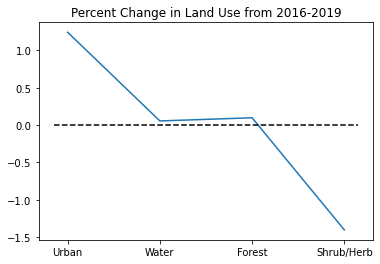

In [11]:
plt.title('Percent Change in Land Use from 2016-2019')
plt.plot(df_cat2['perc_diff'][0:4])
xmin, xmax, ymin, ymax = plt.axis()
plt.hlines(0,xmin,xmax,'k','--')

In [12]:
landcover = {'bands': ['landcover']}
Map.addLayer(NLCD2019,landcover, name='NLCD 2019')
#Map.add_legend(builtin_legend='NLCD')
Map

Map(center=[20, 0], controls=(WidgetControl(options=['position', 'transparent_bg'], widget=HBox(children=(Togg…

In [13]:
# Get landsat8 imagery
landsat8 =ee.ImageCollection("LANDSAT/LC08/C02/T1_L2")
image = ee.Image(landsat8
    .filterBounds(Point)
    .filterDate('2013-06-01', '2013-09-01')
    .sort('CLOUD_COVER_LAND').first())
image_2013=image.clip(Area)
image_2013=image_2013.select(['SR_B1', 'SR_B2', 'SR_B3', 'SR_B4', 'SR_B5', 'SR_B6', 'SR_B7'])
image_2013=image_2013.multiply(0.0000275).add(-0.2)

In [14]:
trueColor = {'bands': ['SR_B4', 'SR_B3', 'SR_B2'], 'min': 0, 'max': 0.4}
falseColor = {'min': 0,'max': 0.2,'bands': ['SR_B5', 'SR_B4', 'SR_B3']}
NDVI = {'min': -0.2,'max': 1.0,'palette': ['blue','white','brown','yellow', 'lime', 'green','navy']}
ndvi_2013=image_2013.normalizedDifference(['SR_B5', 'SR_B4'])
Map.addLayer(image_2013, trueColor, name='Landsat8 True 2013')
Map.addLayer(image_2013, falseColor, name='Landsat8 False 2013')
Map.addLayer(ndvi_2013, NDVI, name='Landsat8 NDVI 2013')
# colors = NDVI['palette']
# vmin = NDVI['min']
# vmax = NDVI['max']
# Map.add_colorbar_branca(colors=colors, vmin=vmin, vmax=vmax, layer_name='Landsat8 NDVI 2013')
Map

Map(center=[20, 0], controls=(WidgetControl(options=['position', 'transparent_bg'], widget=HBox(children=(Togg…

In [15]:
# Soil and Shrub
soil_pnt1 = ee.Geometry.Point([-104.9360, 39.4397]).buffer(300)
soil_pnt2 = ee.Geometry.Point([-105.0345, 39.4658]).buffer(300)
soil_pnt3 = ee.Geometry.Point([-104.8495, 39.5143]).buffer(300)
soil_pnt4 = ee.Geometry.Point([-105.0446, 39.4953]).buffer(300)
soil1 = ee.Feature(soil_pnt1, {'class': 2, 'name': 'soil'})
soil2 = ee.Feature(soil_pnt2, {'class': 2, 'name': 'soil'})
soil3 = ee.Feature(soil_pnt3, {'class': 2, 'name': 'soil'})
soil4 = ee.Feature(soil_pnt4, {'class': 2, 'name': 'soil'})

# Forest
for_pnt1 = ee.Geometry.Point([-105.1067, 39.4512]).buffer(200)
for_pnt2 = ee.Geometry.Point([-105.1361, 39.5016]).buffer(200)
for_pnt3 = ee.Geometry.Point([-104.9208, 39.4495]).buffer(200)
for1 = ee.Feature(for_pnt1, {'class': 1, 'name': 'Forest'})
for2 = ee.Feature(for_pnt2, {'class': 1, 'name': 'Forest'})
for3 = ee.Feature(for_pnt3, {'class': 1, 'name': 'Forest'})

# Water
wat_pnt1 = ee.Geometry.Point([-105.0646, 39.5509]).buffer(500)
wat_pnt2 = ee.Geometry.Point([-105.0194, 39.5694]).buffer(240)
wat_pnt3 = ee.Geometry.Point([-105.0509, 39.6187]).buffer(225)
wat_pnt4 = ee.Geometry.Point([-105.0655, 39.4493]).buffer(200)
water1 = ee.Feature(wat_pnt1, {'class': 0, 'name': 'water'})
water2 = ee.Feature(wat_pnt2, {'class': 0, 'name': 'water'})
water3 = ee.Feature(wat_pnt3, {'class': 0, 'name': 'water'})
water4 = ee.Feature(wat_pnt4, {'class': 0, 'name': 'water'})

urb_pnt1 = ee.Geometry.Point([-105.0011, 39.5451]).buffer(400)
urb_pnt2 = ee.Geometry.Point([-104.8772, 39.5625]).buffer(400)
urb_pnt3 = ee.Geometry.Point([-105.0004, 39.5481]).buffer(400)
urb_pnt4 = ee.Geometry.Point([-105.0163, 39.5362]).buffer(400)
urb1 = ee.Feature(urb_pnt1, {'class': 3, 'name': 'urban'})
urb2 = ee.Feature(urb_pnt2, {'class': 3, 'name': 'urban'})
urb3 = ee.Feature(urb_pnt3, {'class': 3, 'name': 'urban'})
urb4 = ee.Feature(urb_pnt4, {'class': 3, 'name': 'urban'})

#Map.addLayer(water1, {'fill_color':'blue', 'outline': 1}, name='water1')
#Map.addLayer(water2, {'fill_color':'blue', 'outline': 1}, name='water2')
#Map.addLayer(water3, {'fill_color':'blue', 'outline': 1}, name='water3')
#Map.addLayer(water4, {'fill_color':'blue', 'outline': 1}, name='water4')
#Map.addLayer(for1, {'fill_color':'green', 'outline': 1}, name='Forest1')
#Map.addLayer(for2, {'fill_color':'green', 'outline': 1}, name='Forest2')
#Map.addLayer(for3, {'fill_color':'green', 'outline': 1}, name='Forest3')
#Map.addLayer(soil1, {'fill_color':'yellow', 'outline': 1}, name='soil1')
#Map.addLayer(soil2, {'fill_color':'yellow', 'outline': 1}, name='soil2')
#Map.addLayer(soil3, {'fill_color':'yellow', 'outline': 1}, name='soil3')
#Map.addLayer(soil4, {'fill_color':'yellow', 'outline': 1}, name='soil4')
#Map.addLayer(urb1, {'fill_color':'red', 'outline': 1}, name='urb1')
#Map.addLayer(urb2, {'fill_color':'red', 'outline': 1}, name='urb2')
#Map.addLayer(urb3, {'fill_color':'red', 'outline': 1}, name='urb3')
#Map.addLayer(urb4, {'fill_color':'red', 'outline': 1}, name='urb4')
Map

Map(center=[20, 0], controls=(WidgetControl(options=['position', 'transparent_bg'], widget=HBox(children=(Togg…

In [16]:
trainingFeatures = ee.FeatureCollection([water1,water2,water3,water4,for1,for2,for3,soil1,soil2,soil3,soil4,urb1,urb2,urb3,urb4])
predictionBands = ['SR_B2', 'SR_B3', 'SR_B4', 'SR_B5' ,'SR_B6','SR_B7']
classifierTraining = image_2013.select(predictionBands).sampleRegions(collection=trainingFeatures,properties=['class'],scale=30)
trainingTesting = classifierTraining.randomColumn('random',69420)
training = trainingTesting.filter(ee.Filter.lt('random', 0.66))
testing = trainingTesting.filter(ee.Filter.gte('random', 0.66))

In [17]:
leaf_val=3
cartclassifier=ee.Classifier.smileCart(minLeafPopulation=leaf_val).train(features=training,classProperty='class',inputProperties=predictionBands)
cartClassificationImage2013=image_2013.select(predictionBands).classify(cartclassifier)

In [18]:
Cart2013_TotalCount=cartClassificationImage2013.reduceRegion(ee.Reducer.count(), Area, 30).getInfo().get('classification')
Cart2013_Counts=cartClassificationImage2013.reduceRegion(ee.Reducer.autoHistogram(), Area, 30).getInfo().get('classification')
Cart2013_df=pd.DataFrame(Cart2013_Counts)
Cart2013_df.columns=['index',"Cart2013_count"]
Cart2013_df=Cart2013_df.set_index('index')
Cart2013_df["Cart2013_percent"]=Cart2013_df["Cart2013_count"]/Cart2013_TotalCount*100
Cart2013_df=Cart2013_df.rename(index={0:"Water",1:"Forest",2:"Shrub/Herb",3:"Urban"})
Cart2013_df

,Cart2013_count,Cart2013_percent
index,,
Water,10231.713725,1.513368
Forest,167646.768627,24.796553
Shrub/Herb,217564.894118,32.179919
Urban,280647.752941,41.510475


In [19]:
Map.addLayer(cartClassificationImage2013, {'min': 0, 'max': 3,'palette':['blue', 'green','yellow','red']},'CART classification 2013')
Map

Map(center=[39.506524163592786, -104.99970955637592], controls=(WidgetControl(options=['position', 'transparen…

In [20]:
# Get landsat8 imagery
landsat8 =ee.ImageCollection("LANDSAT/LC08/C02/T1_L2")
image = ee.Image(landsat8
    .filterBounds(Point)
    .filterDate('2018-06-01', '2018-09-01')
    .sort('CLOUD_COVER_LAND').first())
image_2018=image.clip(Area)
image_2018 = image_2018.select(['SR_B1', 'SR_B2', 'SR_B3', 'SR_B4', 'SR_B5', 'SR_B6', 'SR_B7'])
image_2018 = image_2018.multiply(0.0000275).add(-0.2)

In [21]:
ndvi_2018=image_2018.normalizedDifference(['SR_B5', 'SR_B4'])
Map.addLayer(image_2018, trueColor, name='Landsat8 True 2018')
Map.addLayer(image_2018, falseColor, name='Landsat8 False 2018')
Map.addLayer(ndvi_2018, NDVI, name='Landsat8 NDVI 2018')
Map

Map(center=[39.506524163592786, -104.99970955637592], controls=(WidgetControl(options=['position', 'transparen…

In [22]:
# Soil and Shrub
soil_pnt1 = ee.Geometry.Point([-105.0158, 39.4577]).buffer(300)
soil_pnt2 = ee.Geometry.Point([-104.8556, 39.5045]).buffer(300)
soil_pnt3 = ee.Geometry.Point([-104.9646, 39.4072]).buffer(300)
soil_pnt4 = ee.Geometry.Point([-105.0985, 39.5166]).buffer(300)
soil1 = ee.Feature(soil_pnt1, {'class': 2, 'name': 'soil'})
soil2 = ee.Feature(soil_pnt2, {'class': 2, 'name': 'soil'})
soil3 = ee.Feature(soil_pnt3, {'class': 2, 'name': 'soil'})
soil4 = ee.Feature(soil_pnt4, {'class': 2, 'name': 'soil'})

# Forest
for_pnt1 = ee.Geometry.Point([-105.1035, 39.4516]).buffer(200)
for_pnt2 = ee.Geometry.Point([-105.0798, 39.4101]).buffer(200)
for_pnt3 = ee.Geometry.Point([-104.9000, 39.4371]).buffer(200)
for1 = ee.Feature(for_pnt1, {'class': 1, 'name': 'Forest'})
for2 = ee.Feature(for_pnt2, {'class': 1, 'name': 'Forest'})
for3 = ee.Feature(for_pnt3, {'class': 1, 'name': 'Forest'})

# Water
wat_pnt1 = ee.Geometry.Point([-105.0628, 39.5509]).buffer(500)
wat_pnt2 = ee.Geometry.Point([-105.0194, 39.5694]).buffer(240)
wat_pnt3 = ee.Geometry.Point([-105.0509, 39.6187]).buffer(225)
wat_pnt4 = ee.Geometry.Point([-105.0655, 39.4493]).buffer(200)
water1 = ee.Feature(wat_pnt1, {'class': 0, 'name': 'water'})
water2 = ee.Feature(wat_pnt2, {'class': 0, 'name': 'water'})
water3 = ee.Feature(wat_pnt3, {'class': 0, 'name': 'water'})
water4 = ee.Feature(wat_pnt4, {'class': 0, 'name': 'water'})

urb_pnt1 = ee.Geometry.Point([-105.0011, 39.5451]).buffer(400)
urb_pnt2 = ee.Geometry.Point([-104.8772, 39.5625]).buffer(400)
urb_pnt3 = ee.Geometry.Point([-105.0004, 39.5481]).buffer(400)
urb_pnt4 = ee.Geometry.Point([-105.0163, 39.5362]).buffer(400)
urb1 = ee.Feature(urb_pnt1, {'class': 3, 'name': 'urban'})
urb2 = ee.Feature(urb_pnt2, {'class': 3, 'name': 'urban'})
urb3 = ee.Feature(urb_pnt3, {'class': 3, 'name': 'urban'})
urb4 = ee.Feature(urb_pnt4, {'class': 3, 'name': 'urban'})

#Map.addLayer(water1, {'fill_color':'blue', 'outline': 1}, name='water1')
#Map.addLayer(water2, {'fill_color':'blue', 'outline': 1}, name='water2')
#Map.addLayer(water3, {'fill_color':'blue', 'outline': 1}, name='water3')
#Map.addLayer(water4, {'fill_color':'blue', 'outline': 1}, name='water4')
#Map.addLayer(for1, {'fill_color':'green', 'outline': 1}, name='Forest1')
#Map.addLayer(for2, {'fill_color':'green', 'outline': 1}, name='Forest2')
#Map.addLayer(for3, {'fill_color':'green', 'outline': 1}, name='Forest3')
#Map.addLayer(soil1, {'fill_color':'yellow', 'outline': 1}, name='soil1')
#Map.addLayer(soil2, {'fill_color':'yellow', 'outline': 1}, name='soil2')
#Map.addLayer(soil3, {'fill_color':'yellow', 'outline': 1}, name='soil3')
#Map.addLayer(soil4, {'fill_color':'yellow', 'outline': 1}, name='soil4')
#Map.addLayer(urb1, {'fill_color':'red', 'outline': 1}, name='urb1')
#Map.addLayer(urb2, {'fill_color':'red', 'outline': 1}, name='urb2')
#Map.addLayer(urb3, {'fill_color':'red', 'outline': 1}, name='urb3')
#Map.addLayer(urb4, {'fill_color':'red', 'outline': 1}, name='urb4')
#Map

In [23]:
trainingFeatures = ee.FeatureCollection([water1,water2,water3,water4,for1,for2,for3,soil1,soil2,soil3,soil4,urb1,urb2,urb3,urb4])
predictionBands = ['SR_B2', 'SR_B3', 'SR_B4', 'SR_B5' ,'SR_B6','SR_B7']
classifierTraining = image_2018.select(predictionBands).sampleRegions(collection=trainingFeatures,properties=['class'],scale=30)
trainingTesting = classifierTraining.randomColumn('random',69420)
training = trainingTesting.filter(ee.Filter.lt('random', 0.66))
testing = trainingTesting.filter(ee.Filter.gte('random', 0.66))

In [24]:
leaf_val=3
cartclassifier=ee.Classifier.smileCart(minLeafPopulation=leaf_val).train(features=training,classProperty='class',inputProperties=predictionBands)
cartClassificationImage2018=image_2018.select(predictionBands).classify(cartclassifier)

In [25]:
Cart2018_TotalCount=cartClassificationImage2018.reduceRegion(ee.Reducer.count(), Area, 30).getInfo().get('classification')
Cart2018_Counts=cartClassificationImage2018.reduceRegion(ee.Reducer.autoHistogram(), Area, 30).getInfo().get('classification')
Cart2018_df=pd.DataFrame(Cart2018_Counts)
Cart2018_df.columns=['index',"Cart2018_count"]
Cart2018_df=Cart2018_df.set_index('index')
Cart2018_df["Cart2018_percent"]=Cart2018_df["Cart2018_count"]/Cart2018_TotalCount*100
Cart2018_df=Cart2018_df.rename(index={0:"Water",1:"Forest",2:"Shrub/Herb",3:"Urban"})
Cart2018_df

,Cart2018_count,Cart2018_percent
index,,
Water,10518.345098,1.555763
Forest,157127.388235,23.240637
Shrub/Herb,237751.325490,35.165685
Urban,270694.070588,40.038230


In [26]:
Map.addLayer(cartClassificationImage2018, {'min': 0, 'max': 3,'palette':['blue', 'green','yellow','red']},'CART classification 2018')
Map

Map(center=[39.506524163592786, -104.99970955637592], controls=(WidgetControl(options=['position', 'transparen…

In [27]:
# Get landsat8 imagery
landsat8 =ee.ImageCollection("LANDSAT/LC08/C02/T1_L2")
image = ee.Image(landsat8
    .filterBounds(Point)
    .filterDate('2022-06-01', '2022-09-01')
    .sort('CLOUD_COVER_LAND').first())
image_2022=image.clip(Area)
image_2022 = image_2022.select(['SR_B1', 'SR_B2', 'SR_B3', 'SR_B4', 'SR_B5', 'SR_B6', 'SR_B7'])
image_2022 = image_2022.multiply(0.0000275).add(-0.2)

In [28]:
ndvi_2022=image_2022.normalizedDifference(['SR_B5', 'SR_B4'])
Map.addLayer(image_2022, trueColor, name='Landsat8 True 2022')
Map.addLayer(image_2022, falseColor, name='Landsat8 False 2022')
Map.addLayer(ndvi_2022, NDVI, name='Landsat8 NDVI 2022')
Map.centerObject(Area)
Map

Map(center=[39.506524163592786, -104.99970955637592], controls=(WidgetControl(options=['position', 'transparen…

In [29]:
# Soil and Shrub
soil_pnt1 = ee.Geometry.Point([-105.0158, 39.4577]).buffer(300)
soil_pnt2 = ee.Geometry.Point([-104.8556, 39.5045]).buffer(300)
soil_pnt3 = ee.Geometry.Point([-104.9646, 39.4072]).buffer(300)
soil_pnt4 = ee.Geometry.Point([-105.0985, 39.5166]).buffer(300)
soil1 = ee.Feature(soil_pnt1, {'class': 2, 'name': 'soil'})
soil2 = ee.Feature(soil_pnt2, {'class': 2, 'name': 'soil'})
soil3 = ee.Feature(soil_pnt3, {'class': 2, 'name': 'soil'})
soil4 = ee.Feature(soil_pnt4, {'class': 2, 'name': 'soil'})

# Forest
for_pnt1 = ee.Geometry.Point([-105.1035, 39.4516]).buffer(200)
for_pnt2 = ee.Geometry.Point([-105.0798, 39.4101]).buffer(200)
for_pnt3 = ee.Geometry.Point([-104.9000, 39.4371]).buffer(200)
for1 = ee.Feature(for_pnt1, {'class': 1, 'name': 'Forest'})
for2 = ee.Feature(for_pnt2, {'class': 1, 'name': 'Forest'})
for3 = ee.Feature(for_pnt3, {'class': 1, 'name': 'Forest'})

# Water
wat_pnt1 = ee.Geometry.Point([-105.0639, 39.5510]).buffer(500)
wat_pnt2 = ee.Geometry.Point([-105.0199, 39.5701]).buffer(240)
wat_pnt3 = ee.Geometry.Point([-105.0509, 39.6187]).buffer(225)
wat_pnt4 = ee.Geometry.Point([-105.0655, 39.4493]).buffer(200)
water1 = ee.Feature(wat_pnt1, {'class': 0, 'name': 'water'})
water2 = ee.Feature(wat_pnt2, {'class': 0, 'name': 'water'})
water3 = ee.Feature(wat_pnt3, {'class': 0, 'name': 'water'})
water4 = ee.Feature(wat_pnt4, {'class': 0, 'name': 'water'})

urb_pnt1 = ee.Geometry.Point([-105.0011, 39.5451]).buffer(400)
urb_pnt2 = ee.Geometry.Point([-104.8960, 39.4720]).buffer(400)
urb_pnt3 = ee.Geometry.Point([-105.0004, 39.5481]).buffer(400)
urb_pnt4 = ee.Geometry.Point([-105.0370, 39.5015]).buffer(400)
urb1 = ee.Feature(urb_pnt1, {'class': 3, 'name': 'urban'})
urb2 = ee.Feature(urb_pnt2, {'class': 3, 'name': 'urban'})
urb3 = ee.Feature(urb_pnt3, {'class': 3, 'name': 'urban'})
urb4 = ee.Feature(urb_pnt4, {'class': 3, 'name': 'urban'})

#Map.addLayer(water1, {'fill_color':'blue', 'outline': 1}, name='water1')
#Map.addLayer(water2, {'fill_color':'blue', 'outline': 1}, name='water2')
#Map.addLayer(water3, {'fill_color':'blue', 'outline': 1}, name='water3')
#Map.addLayer(water4, {'fill_color':'blue', 'outline': 1}, name='water4')
#Map.addLayer(for1, {'fill_color':'green', 'outline': 1}, name='Forest1')
#Map.addLayer(for2, {'fill_color':'green', 'outline': 1}, name='Forest2')
#Map.addLayer(for3, {'fill_color':'green', 'outline': 1}, name='Forest3')
#Map.addLayer(soil1, {'fill_color':'yellow', 'outline': 1}, name='soil1')
#Map.addLayer(soil2, {'fill_color':'yellow', 'outline': 1}, name='soil2')
#Map.addLayer(soil3, {'fill_color':'yellow', 'outline': 1}, name='soil3')
#Map.addLayer(soil4, {'fill_color':'yellow', 'outline': 1}, name='soil4')
#Map.addLayer(urb1, {'fill_color':'red', 'outline': 1}, name='urb1')
#Map.addLayer(urb2, {'fill_color':'red', 'outline': 1}, name='urb2')
#Map.addLayer(urb3, {'fill_color':'red', 'outline': 1}, name='urb3')
#Map.addLayer(urb4, {'fill_color':'red', 'outline': 1}, name='urb4')
#Map

In [30]:
trainingFeatures = ee.FeatureCollection([water1,water2,water3,water4,for1,for2,for3,soil1,soil2,soil3,soil4,urb1,urb2,urb3,urb4])
predictionBands = ['SR_B2', 'SR_B3', 'SR_B4', 'SR_B5' ,'SR_B6','SR_B7']
classifierTraining = image_2022.select(predictionBands).sampleRegions(collection=trainingFeatures,properties=['class'],scale=30)
trainingTesting = classifierTraining.randomColumn('random',69420)
training = trainingTesting.filter(ee.Filter.lt('random', 0.66))
testing = trainingTesting.filter(ee.Filter.gte('random', 0.66))

In [31]:
leaf_val=3
cartclassifier=ee.Classifier.smileCart(minLeafPopulation=leaf_val).train(features=training,classProperty='class',inputProperties=predictionBands)
cartClassificationImage2022=image_2022.select(predictionBands).classify(cartclassifier)

In [32]:
Cart2022_TotalCount=cartClassificationImage2022.reduceRegion(ee.Reducer.count(), Area, 30).getInfo().get('classification')
Cart2022_Counts=cartClassificationImage2022.reduceRegion(ee.Reducer.autoHistogram(), Area, 30).getInfo().get('classification')
Cart2022_df=pd.DataFrame(Cart2022_Counts)
Cart2022_df.columns=['index',"Cart2022_count"]
Cart2022_df=Cart2022_df.set_index('index')
Cart2022_df["Cart2022_percent"]=Cart2022_df["Cart2022_count"]/Cart2022_TotalCount*100
Cart2022_df=Cart2022_df.rename(index={0:"Water",1:"Forest",2:"Shrub/Herb",3:"Urban"})
Cart2022_df

,Cart2022_count,Cart2022_percent
index,,
Water,11216.690196,1.659058
Forest,124959.384314,18.482710
Shrub/Herb,204034.854902,30.178742
Urban,335879.200000,49.679805


In [33]:
Map.addLayer(cartClassificationImage2022, {'min': 0, 'max': 3,'palette':['blue', 'green','yellow','red']},'CART classification 2022')
Map

Map(center=[39.506524163592786, -104.99970955637592], controls=(WidgetControl(options=['position', 'transparen…

In [34]:
Merge_df=pd.concat([Cart2013_df,Cart2018_df,Cart2022_df],axis=1)
Merge_df

,Cart2013_count,Cart2013_percent,Cart2018_count,Cart2018_percent,Cart2022_count,Cart2022_percent
index,,,,,,
Water,10231.713725,1.513368,10518.345098,1.555763,11216.690196,1.659058
Forest,167646.768627,24.796553,157127.388235,23.240637,124959.384314,18.482710
Shrub/Herb,217564.894118,32.179919,237751.325490,35.165685,204034.854902,30.178742
Urban,280647.752941,41.510475,270694.070588,40.038230,335879.200000,49.679805


In [35]:
Merge_df['perc_diff13_18']=Merge_df['Cart2018_percent']-Merge_df['Cart2013_percent']
Merge_df['perc_diff18_22']=Merge_df['Cart2022_percent']-Merge_df['Cart2018_percent']
Merge_df['perc_diff_all']=Merge_df['Cart2022_percent']-Merge_df['Cart2013_percent']
Merge_df

,Cart2013_count,Cart2013_percent,Cart2018_count,Cart2018_percent,Cart2022_count,Cart2022_percent,perc_diff13_18,perc_diff18_22,perc_diff_all
index,,,,,,,,,
Water,10231.713725,1.513368,10518.345098,1.555763,11216.690196,1.659058,0.042396,0.103294,0.145690
Forest,167646.768627,24.796553,157127.388235,23.240637,124959.384314,18.482710,-1.555917,-4.757927,-6.313843
Shrub/Herb,217564.894118,32.179919,237751.325490,35.165685,204034.854902,30.178742,2.985765,-4.986942,-2.001177
Urban,280647.752941,41.510475,270694.070588,40.038230,335879.200000,49.679805,-1.472244,9.641575,8.169330


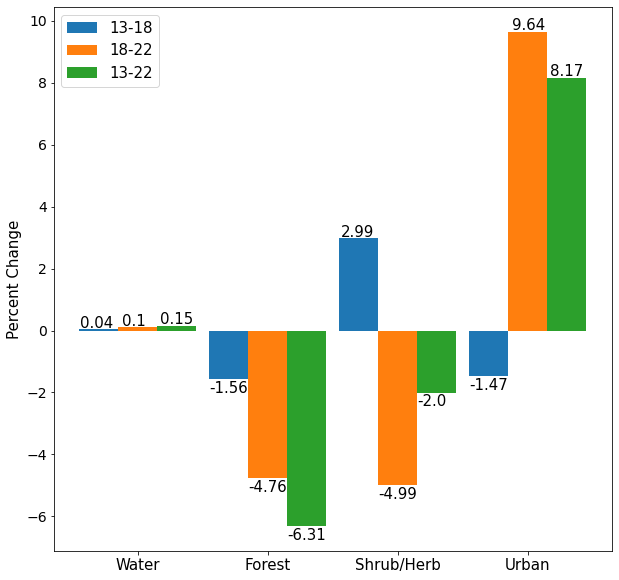

In [39]:
plt.figure(figsize=(10,10))
x=Merge_df.index.to_list()
Y1=Merge_df.perc_diff13_18.values
Y1_text=np.around(Y1,2)
Y2=Merge_df.perc_diff18_22.values
Y2_text=np.around(Y2,2)
Y3=Merge_df.perc_diff_all.values
Y3_text=np.around(Y3,2)
X_axis=np.arange(len(x))
plt.bar(X_axis-0.3,Y1,0.3,label='13-18')
plt.bar(X_axis+0.0,Y2,0.3,label='18-22')
plt.bar(X_axis+0.3,Y3,0.3,label='13-22')
plt.xticks(X_axis,x,fontsize=15)
plt.yticks(fontsize=14)
plt.ylabel('Percent Change',fontsize=15)
plt.legend(fontsize=15)
for index, value in enumerate(Y3_text):
    if value>=0:
        plt.text(X_axis[index]+0.17,Y3[index]+.05,str(value),fontsize=15)
    else:
        plt.text(X_axis[index]+0.15,Y3[index]-.45,str(value),fontsize=15)
for index, value in enumerate(Y2_text):
    if value>=0:
        plt.text(X_axis[index]-0.12,Y2[index]+.05,str(value),fontsize=15)
    else:
        plt.text(X_axis[index]-0.15,Y2[index]-.45,str(value),fontsize=15)
for index, value in enumerate(Y1_text):
    if value>=0:
        plt.text(X_axis[index]-0.44,Y1[index]+.05,str(value),fontsize=15)
    else:
        plt.text(X_axis[index]-0.45,Y1[index]-.45,str(value),fontsize=15)
plt.show()